## Review

Привет, Максим!

Меня зовут Глеб, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя - дай знать, и мы перейдем на "вы".

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-success" role="alert">
    <b>Успешно: </b>Если ты сделал что-то очень хорошо, я выделил комментарий в блок зеленого цвета.
</div>

<div class="alert alert-warning" role="alert">
    <b>Улучшить: </b>Если я хочу дать тебе совет или думаю, что что-то можно улучшить, тогда я буду желтым выделять блок. Хочу отметить, что это необязательная рекомендация.
</div>

<div class="alert alert-danger" role="alert">
  <b>Нужно исправить: </b>Если проект требует дополнительной работы, чтобы я мог принять ее, то цвет блока будет выделен красным.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:


<div class="alert alert-info" role="alert">
  <b>Комментарий студента: </b>  Например, вот так.
</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 


### <font color='orange'>Общий отзыв о работе:</font>
* Спасибо, что прислал свой проект. Ты действительно хорошо поработал над этим!
* Большие выводы в конце каждого блока очень удобны. Я рад что ты подводишь такие подробные итоги.
* Мне было очень приятно видеть практически над каждой строчкой кода твои комментарии о том, что она делает. Это удобно для проверяющего и в первую очередь для тебя самого. Команды будут быстрее запоминаться и если нужно будет что-то исправить ты быстро сможешь соориентироваться в своей работе.
* Есть несколько мелких замечаний, которые необходимо сделать, прежде чем твоей проект может быть принят, но почти все они довольно просты.
* Я верю, что ты сможешь легко исправить это! Я жду новую версию проекта. Удачи тебе!

---


## Исследование надёжности заёмщиков 

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [6]:
#Загрузим необходимые библиотеки для работы с данными и визуализации 
import pandas as pd
import numpy as np
from pymystem3 import Mystem
m = Mystem()
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Прочитаем данные (настройка encoding не требуется) и сохраним в переменную df.
df = pd.read_csv('/datasets/data.csv')


In [8]:
#Выведем первые 10 строк таблицы 
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [9]:
# <получение общей информации о данных в таблице df> - Дадим описательную характеристику структуры и состава данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [10]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

    Рассмотрим полученную информацию подробнее.

    Всего в таблице 12 переменных, тип данных: вещественные, целочисленные и неопределенные 

    Подробно разберём, какие в df столбцы и какую информацию они содержат:
    children — количество детей в семье 
    days_employed — общий трудовой стаж в днях 
    dob_years — возраст клиента в годах 
    education — уровень образования клиента 
    education_id — идентификатор уровня образования 
    family_status — семейное положение 
    family_status_id — идентификатор семейного положения 
    gender — пол клиента 
    income_type — тип занятости 
    debt — имел ли задолженность по возврату кредитов 
    total_income — ежемесячный доход 
    purpose — цель получения кредита

    Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения: В данных 21525 наблюдений. В переменных total_incom и days_employed  - 19351.

    Обращем внимание на наличие первых артефактов в данных (несуществующих значений) - отрицательные значения переменной days_employed

    Посмотрим на состав и распределение данных

In [ ]:
#Состав и распределение значений переменных с помощью метода value_counts (суммирующего количество всех уникальных значений переменных)

In [11]:
df.family_status.value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [12]:
df.income_type.value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [13]:
df.education.value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [14]:
#для оптимизации ресурсов выведем последние 15 строк количества уникальных значений категории "возраста"
df.dob_years.value_counts().tail(15)

66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [15]:
df.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [16]:
#Проверим размах переменной общий доход(минимальное значение)
df.total_income.min()

20667.26379327158

In [17]:
#Проверим размах переменной общий доход(максимальнон значение)
df.total_income.max()

2265604.028722744

In [18]:
#Посмотрим на среднее значение переменной
df.total_income.mean()

167422.30220817294

In [19]:
#Посмотрим на медиану переменной 
df.total_income.median()

145017.93753253992

    
    В результате первичного скорринга переменных мы обнаружили три новые проблемы с данными. 
    1. Наличие кросслитерации в строковых значениях переменных family_status и education (во втором случае не унифицированные значения опасны ввиду дублирования из-за различий в регистре), 
    2. Смещенность распределения значений в переменной income_type (что несколько критично для дальнейшей категоризации данных), 
    3. Наличие артефакта в значении переменной dob_years (101 значение 0-го возраста), а также отрицательных значения в переменной children (-1) и экстримально высокого показателя - количества детей (20) в 76 случаях - что может свидетельствовать об ошибке в данных. 
    4. Вопрос о качестве данных вызывает размах между минимальным и максимальным значением переменной "общий доход" - максимальное значение слишком велико для того, чтобы соответствовать ежемесячному доходу. Предположения два: либо доход указан не в рублях (например, тенге), либо цифры отражают фальсификацию документов заемщиками, которые приносят в банк информации о заведомо преувеличенном располагаемом ежемесячном доходе. 

<div class="alert alert-success">Отличные выводы, ты увидел всё, что необходимо исправить в данных для первоначального анализа.</div>

In [20]:
#Посмотрим на статистику данных
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Среднее значение интересующей (в рамках анализа) переменной debt (булиевая переменная) равно 0.08 (8%) - значение невозврата заемщиками кредита в срок. 
С учетом предварительного анализа данных решим проблемы с битыми данными, пропусками и дубликатами и ответим на вопрос о зависимости между "семейным положением", "наличием детей", "уровнем дохода", указанными "целями кредита" и возврата займа в срок.  

### Шаг 2. Предобработка данных

### Обработка пропусков

In [21]:
#Оценим значение долю пропусков в двух переменных days_employed и total_income - 10% объемная доля
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [22]:
#Посчитаем сумму пропущенных значений в указанных переменных: 
df.days_employed.isna().sum()
df.total_income.isna().sum()

2174

In [23]:
#Произведем проверку на равенство строковому значению "NaN"
df[np.isnan(df['days_employed']) & np.isnan(df['total_income'])].shape

(2174, 12)

<div class="alert alert-warning">
    Из кода выше, можно сделать заключение что пропуски в двух столбцах симметричны и попробовать найти причину почему именно у этих пользователей и в этих столбцах имеются NaN.
    <br><br>
Для начала следует рассмотреть характер появления пропусков. Возможно, симметричные пропуска зависимы от определенной характеристики клиента. Одними из основных показателей при принятии решении о выдачи кредита для банка являются тип занятости и возраст клиента. Поэтому, проверку зависимости пропусков от значения других показателей начнем со столбцов income_type (тип занятости) и dob_years (возраст клиента в годах).
<br><br>
Возможно зависимости нет и пропуски случайны, но это хорошая практика исследовать данные, так поступают настоящие профессионалы.
</div>

<font color='blue'>Глеб, большое спасибо тебе за все твои комментарии и, в частности, за этот! Если быть честным, я пробовал покрутить данные в этом ключе, но довольно поверхностно, например, через loc на совместную встречаемость пропусков и других ошибок в данных. Твоя предложение очень полезно. Я бы (именно в этом разделе) мог бы попробовать поискать зависимости между этими переменными. 
Но тут у меня две проблемы:
Так как я уже структурировал проект таким образом, что исправление ошибок и артефактов в переменных тип занятости и возраст клиентов в годах, боюсь, приступив, "запороть" здесь расчеты - учитывая, что в понедельник открывается новый стрим, а время суббота и еще необходимо получить твой ответ на критические замечания и на него ответить - я бы покрутил эти данные в своей тетрадке-черновике и уже дополнил этой информацией этот проект - так сказать - в парадный вариант первого портфолию. Но правильно ли я понимаю, что здесь мне было бы полнезно поступить следующим образом: 1. получить таблицу в которой будут только строки с пропущенными значениями в столбце total_income , days_employed . Пример: df_income_absence = df[df['total_income'].isna()] / df_emploed_absence = df[df['dayes_employed'].isna()] 2. попробовать отысказать зависимости между пропусками и переменными income_type и dob_years следующим образом: сгруппировать по каждому из них, аггрегировав количество (count) или среднее (mean) пропусков. Пример: df_income_absence.groupby['income_type'].agg({'total_income': 'count'}) 
Буду очень признателен за твой ответ.

In [24]:
#Выведем таблицу с отсутствиующими значениями общего дохода. Обращаем внимание на то, 
#что отсутствующие значения распределены между разными соц-дем характеристиками заемщиков 
df[np.isnan(df['total_income'])].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


    Для того, чтобы заполнить пропуски переменной "общий доход" (ежемесячный), воспользуемся медианными значениями этой переменной в категории "тип занятости"(наиболее оптимальной для теоретической аппроксимации в срезе отсутствующих значений переменной). Медиана применительно к арифметической оценке уровня дохода имеет преимущество перед оценкой среднего, ввиду вероятностно сильного разброса значений (высокой дисперсии), что может привести к искаженной (скошенной, не взвешенной) оценке. 

In [26]:
m_table = df.groupby(['income_type']).agg({'total_income' : 'median'})
m_table

,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,150447.935283
компаньон,172357.950966
пенсионер,118514.486412
предприниматель,499163.144947
сотрудник,142594.396847
студент,98201.625314


In [27]:
def total_income_fill_with_median(row):
    total_income = row['total_income']
    income_type = row['income_type']
    if np.isnan(total_income):
        return m_table.loc[income_type, 'total_income']
        #return 'замена'
    #return 'замен нет'
    return total_income
 
df['total_income'] = df.apply(total_income_fill_with_median, axis = 1)

In [28]:
#проверим, заменилось ли корректно по значению
df['total_income'].value_counts()

142594.396847    1105
172357.950966     509
118514.486412     414
150447.935283     147
499163.144947       2
                 ... 
133299.194693       1
115080.782380       1
84896.781597        1
153838.839212       1
150014.128510       1
Name: total_income, Length: 19353, dtype: int64

In [29]:
df['total_income'].isna().sum()

0

<div class="alert alert-danger"><b>Нужно исправить: </b>при работе с данными, пытайся избегать циклов. В pandas есть много методов, которые могут помочь преобразовать тебе данные как тебе угодно. Циклов стоит избегать, так как они намного медленнее работают. Если тебе придется работать даже со средним объемом данных, циклы заставят тебя ждать по несколько дней, когда в pandas можно применить одну команду и времени займет на порядок меньше.</div>

<font color='blue'>Ответ на комментариий: Я внес изменения в код и заменил пропущенные значения переменной "общий доход в месяц" с помощью медианных значений этой переменной в категории "тип занятости" без использования циклов. Сделал я это с помощью функции, которая применяется через apply. Функция на вход принимает строчку датафрейма, достает из нее значение с доходом и типом занятости, проверяет, что доход пустой по значению и если это так, то по значению типа занятости обращается в сводную таблицу с медианами и возвращает соответствующую расчетную величину. В противном случае - возвращает исходное значение переменной "общий доход в месяц". 

Также я предлагаю измерить скорость работы первого (через цикл) и второго (через функцию и apply) варианта отработки кода. Для этого в начале каждой из ячеек я добавил строчку %%time (время исполнения цикла - т.е. первого варианта - я замерил в своей тетрадке на локальном Jupyter.

Результат: Отработка кода с циклом - 87.7 ms  Отработка кода с apply - 685 ms - возможно, я допустил ошибку в проверке на скорость исполнения, но с циклом код отрабатывает быстрее. Причина для меня, на жанном этапе, не предельно ясна!  
Прошу обратить внимание, однако, что я осознал, что циклы плохо использовать для итерации по строчкам датафрейма. Для таких задач есть встроенные метода вроде apply().

    Категория "стаж" (общий трудовой стаж в днях) трудно поддается аппроксимации пропущенных значений на основе средних значений, сгруппированных на альтернативных переменных ("тип занятости" (или тип дохода), "возраст", "семеное положение" и пр.). Причина довольно очевидна - вне зависимости от поло-возрастных и соц-дем характеристик совокупный официальный стаж сильно партикулярный (зависит от целого ряда других факторов). 
    
    Подкрепляя это соображение актуализацией экономии трафика, заменим отсутствующие значения переменной days_employed на целочисленное отрицательное значение -10, которая, в свою очередь, позволит легко отфильтровать данные в случае обращения к переменной. Мы не рекоммендуем оставлять NaN в переменной, ввиду того, что NaN может быть представлен только типом float - что может вызовать проблемы при проверки на равенства (например, числа X.0000001)
    
    На данном этапе, чтобы привести по модулю все значения данной переменно к положительным числам, временно заменим NaN на несуществующую значение 1000000 дней (несуществующий стаж - длиннее человеческой жизни)

In [366]:
#Применим функцию fillna (заполнить пропуски), в качестве аргумента укажем 
df['days_employed'] = df['days_employed'].fillna(1000000)
#Проверим наличие пропусков 
print('Количество пропусков в переменной "общий стаж в днях" после применения метода замены: {}'.format(df['days_employed'].isna().sum()))

Количество пропусков в переменной "общий стаж в днях" после применения метода замены: 0


In [367]:
#проверим заменилось ли корректно по значению
df['days_employed'].loc[df['days_employed'] == 1000000] 

12       1000000.0
26       1000000.0
29       1000000.0
41       1000000.0
55       1000000.0
           ...    
21489    1000000.0
21495    1000000.0
21497    1000000.0
21502    1000000.0
21510    1000000.0
Name: days_employed, Length: 2174, dtype: float64

In [334]:
#подспутно избавимся от отрицательных значений переменной, применив функцию abs() к значениям столбца, 
#которая возвращает модуль от значения числа.  
df.days_employed = df.days_employed.abs()
#проверим, избавились ли от отрицательного стажа
df.days_employed.value_counts()

1000000.000000    2174
986.927316           1
4906.125062          1
4236.274243          1
6620.396473          1
                  ... 
2849.351119          1
5619.328204          1
448.829898           1
1687.038672          1
582.538413           1
Name: days_employed, Length: 19352, dtype: int64

In [368]:
#days_employed по-прежнему float (этот тип переменных может номинально быть целым числом), зато мы избавились от отрицательных значений и временно маркировали NaN несуществующим числом-артефактом
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [369]:
#Подобным образом избавимся от отрицательных значений в children (количество детей)
df.children = df.children.abs()
#Проверяем
df.children.value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

### Вывод

    В данном разделе мы провели разведовательный анализ на поиск пропущенных значений, а также замену последних на маркеры или медианную аппроксимацию на основе значений столбцов с пропущенными значения для значений релевантной переменной - "тип занятости". 
    
    Было обнаружено 2174 пропущенных значений в двух переменных: "общий стаж в днях" "общий доход в месяц" (переменная для анализа). Доля пропусков составляет около 10% от общего массива данных, что является критическим основанием для замены (не удаления) с целью избежания потери информации о заемщиках. 
    
    Для замены пропущенных значений "общий доход в месяц" была выбрана медианная аппроксимация группировки ее значений в категории "тип занятости". Во-первых, "тип занятости" (или тип дохода) лучше остальных переменных анализа прогнозирует ежемесячных доход (характер труда-зарплата), сама по себе категория хорошо диверсифицирована с прозрачными границами внутри групп (в ней есть представлены также пенсионеры), однако не достаточно насыщена и представлена (было бы лучше выбрать альтернативную "трудовую сетку" или иные критерии "классового", "трудового" деления в неолиберальных экономиках). Во-вторых, прогнрозирование значений категорий "доход" на основе "типа занятости" обладает аналитическим преимуществом(позволяет избежать ошибки некогеретных групп высокозарабытвающие пенсионеры и состоятельные госсслужащие). В-третьих, "медиана" наиболее релевантна в расчете усредненного дохода - среднее значение чувствительно к выбросам - это актуально для наших данных о доходе, имеющий широкий размах значений. 
    
    Для замены пропущенных значений "общий стаж в днях" был выбран способ применения артефактов - маркеров несуществующих значений. Категория (официальный!) стаж чрезвычано партикулярна и не может (даже в грубой форме) быть спрогнозирована значениями "характера труда". В некоторой степени, стаж (в грубой форме) может быть аппроксимирован по значениям переменной "возраст" - однако, в рамках аналитической работы определения факторов возврата кредит в срок, подобная экстраполяция данных может внести неясность в результат переменной "возврат кредита". В дальнейшем анализе рекоммендуем фильтровать переменную "стаж" от несуществующего числа (исключив пропущенные значения).
    
    В данном разделе также были проведены некоторые работы подготовки данных к последующей трансформации типов переменных и поиску дубликатов. 
    
    В результате анализа мы выяснили, что пропущенные строки двух переменных тавтологичны - т.е. совпадают (чего не скажешь о других "ошибках","багах" и "дубликатов"). Причина такой ошибки может быть как сбой в системе верификации, так и человеческий фактор - внесения в колонки данных на этапе составления данных. Так, есть два сценанрия выдачи кредита - 1) Заемщик обращается напряму в банк, в этом случае, сотрудник банка вносит данные в анкету, исходя из полученной информации от заемщика. На этом этапе может допустить ошибку как сотрудник банка. 2) Заемщик составляет заявку он-лайн - на этом этапе он может по какой-то причине не внести нужные данные, либо внести их неправильно. 3) В обоих случая - далее информация отправляется в службу безопасности банка - данные проверяются - недостоверная / нерелевантная / неточная информация может послужить основой пропуска данных. 

<div class="alert alert-success">Этап первоначальной обработки данных выполненх хорошо, ты написал отличные выводы. Не забудь исправить комментарии выше.</div>

### Замена типа данных

In [370]:
#Для того, чтобы привести переменную total_income в нужный тип, применим метот astype() с аргументом int64 (целочисленный)
#Предварительно округлив до целого числа
df['total_income'] = df['total_income'].round()
df['total_income'] = df['total_income'].astype('int64')
df.dtypes
df['total_income'].head(2)

0    253876
1    112080
Name: total_income, dtype: int64

In [371]:
#Для того, чтобы начать работу с переменной days_employed, округлим ее значение до целого
df['days_employed'] = df['days_employed'].round()

#
df['days_employed'] = df['days_employed'].astype('int64')
#df.dtypes


In [372]:
df.dtypes

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
dtype: object

### Вывод

    В данном разделе была проведена замена вещественных типов данных (типа float) на целочисленный (типа interge) двух переменных "общий стаж работы в днях" и "общий доход в месяц", предварительно округлив до нуля.
    Тип переменной int64 позволяет избавиться от дробной части чисел (что облегчает восприятие, облегчает анализ и экономит ресурсы хранения данных).
    Наибольший интерес вызывает работа с переменной "общий стаж в днях": для того, чтобы округлить эту переменную потребовалось заменить NaN на целое несуществующее число. К несчатью, датафреймы, в отличии от серий, не позволяют перевести всю колонку в числовые переменные, если в них присутствуют текстовые значения - это ограничивает возможности замены пропущенных значений переменной на более наглядный маркер 'unknown' с сохранением типа переменной int или float. Потенциальный метод замены строковых значений в число - to_numeric() - с параметром - errors='ignore' (некорректные значения игнорируются, но остаются) - на колонке с текстовыми значениями не отрабатывается. 
    В пандасе строковые объекты по дефолту представляются типом object, дополнительно менять данный тип не нужно.

<div class="alert alert-success">Мне приятно видеть, что ты использовал метод to_numeric, да еще и изучил его параметры. Респект!</div>

### Обработка дубликатов

    Перед тем, как заняться поиском и обработкой дубликатов в строках, мы видим смыслы провести две процедуры по "чистке" данных: 
    1.Унифицировать литерацию значений в столбцах education, family_status для того, чтобы удалить повторяющиеся строки, вызыванные тавтологичными по значению, но разными по записи данные, 
    2. Заполнить дублированные 0 в переменной "возраст заемщика" (dob_years), записанных в данные по ошибке. 
    3. Обработать ошибки в категории children - для того, чтобы избавиться от лишних категорий переменной, возникших из-за "ошибки" (предполагаемо, ввода)

In [373]:
#Приведем все варианты написания значений переменной "образование" к построчному (избавившись от заглавного) виду 
df['education'] = df['education'].str.lower()
#Посмотрим, какие категории заемщиков теперь здесь присутствуют 
df['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

<div class="alert alert-success">Очень важный момент, молодец что заметил и исправил.</div>

In [374]:
#Приведем все варианты написания значений переменной "семейный статус" к построчному (избавившись от заглавного) виду 
df['family_status'] = df['family_status'].str.lower()
#Посмотрим, какие категории заемщиков теперь здесь присутствуют 
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [375]:
#Обратимся к переменной "возраст заемщика": заменим дублированные 0 в значении переменной с помощью средних значений последней, 
#категоризированных по "типу занятости"
#1.Построим сводную таблицу средних значений возраста заемщиков, сгруппированную по "типу занятости" и сохраним ее в переменную
new_m_table = df.groupby(['income_type']).agg({'dob_years': 'mean'})
#2.Округлим значение "среднего возраста" до целого и переведем ее в тип integer для того, чтобы транспанировать ее значения на нули исходной таблицы
new_m_table['dob_years'] = new_m_table.dob_years.round().astype('int64')
#3.Напишем цикл, который пробегается по всем значениям переменной "тип занятости" 
#и заменяет ее значениями (переменных средних "возраст заещька" все 0 в исходной таблице (переменной "dob_years")
for income_type in new_m_table.index:
    m = new_m_table.loc[income_type, 'dob_years']
    df.loc[df['income_type'] == income_type, 'dob_years'] = df.loc[df['income_type'] == income_type, 'dob_years'].replace(0, m)
#Выведем первые 10 строк двух нужных столбцов таблицы
df[['income_type', 'dob_years']].head(10)


,income_type,dob_years
0,сотрудник,42
1,сотрудник,36
2,сотрудник,33
3,сотрудник,32
4,пенсионер,53
5,компаньон,27
6,компаньон,43
7,сотрудник,50
8,сотрудник,35
9,сотрудник,41


In [376]:
#Проверим наличие нулей в нужном столбце исходной таблицы 
df['dob_years'].loc[df['dob_years'] == 0]

Series([], Name: dob_years, dtype: int64)

    Обратимся к переменной "количество детей". Как уже было указано в описательной части проекта, в 76 случаев количество детей составляет критически высокое число "20", в разрезе других категориальных значений (от 1 до 5). Сначала обратимся к структуре данных в срезе конкретного экстремума для того (совместной встречаемости с другими значениями переменных), чтобы удостовериться в том, что это - ошибка. Далее заменим это значение на наиболее релевантное.

In [377]:
#Проверим, сколько в среднем детей у заемщиков по всем категориям без 20: 0,5 
df.children.describe()

#Первые 5 строк вывода демонстрируют, что 20 детей присвоено категориям от 21 года
df.children.head(5)
#В 10 случаях по двум другим столбцам с отсутствующими значениями - совпадения.
df[(df['days_employed'] == 1000000) & (df['children'] == 20)].shape

(9, 12)

In [378]:
#Применим метод замены значения в строках replace
df['children'] = df['children'].replace(20, 2)

In [379]:
#Посмотрим, как распределилось "количество детей" 
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

    Приступим к удалению дубликатов. Определим количество и удолим повторяющиеся строки. NB! Прежде, чем это сделать, необходимо отметить, что результат поиска количества дубликатов в данных не позволяет  методом duplicated().sum() окончательно убедиться в "дублирующей" составляющей строк: нам действительно не хватает ID или паспортных данных, чтобы однозначно утверждать дубль строка или нет. Однако, совпадение значений по значениям представленных в датафрейме переменным будем считать достаточным основанием для того, чтобы считать последние в качестве дублей. 

In [380]:
#Проверим количество дубликатов в датафрейме: 71
df.duplicated().sum()

71

In [381]:
#удалим дубликаты методом, релевантным для строк, drop_duplicates(), применим функцию reset_index с аргументом (drop = True)
#для того, чтобы унифицировать порядок индексов нового датафрейма,
#сохраним результат удаления в текущий датафрейм
df = df.drop_duplicates().reset_index(drop = True)
#проверим наличие дубликатов
df.duplicated().sum()

0

### Вывод

    В данный раздел анализа мы отнесли как разведовательный анализ поиска и удаления ошибок в данных, дублирующих строки и регистры данных, а также увеличивающих те разделы данных, которые являются по своей природе тавтологичными или относящиеся к одной и той же категории - так и поиск и удаление непосредственных дубликатов (которые мы получили на первом этапе).
    Итак.
    Во-первых, мы унифицировали все варианты записи значений строковых переменных (с заглавной, на прописную) с помощью алгоритма приведения к нижнему регистру str.lower в переменных "образование" и "семейный статус". В переменной "образование" это привело к тому, что разные написания одного и того же образования свелись к единым категориям, число которых уменьшилось в 3 раза (с 15 до 5). Ошибка записи: человеческий фактор записи данных)
    Во-вторых, мы обратились к категории "возраст заемщика", заменив 101 значения 0 в этой переменной на средние значения этой переменной для каждой категории переменной "тип занятости". Аппроксимация по "типу занятости" дублированных / ошибочных значений "возраста заемщика" объясняется следующим образом: 1. Это позволяет избежать ошибки последующей категоризации ("40 летний пенсионер"), что было бы возможно в случае группировки по другим переменным. 2. Сама по себе переменная "тип занятости" довольно хорошо насыщена (равномерно представлена, взвешана относительно количества заемщиков), внутри своих подкатегорий переменная хорошо представлена по поло-возрастным характеристикам). Все это позволяет прогнозирование значение "возраста", в данном случае, посредством, довольно грубой аппроксимации. Отличие цикла в данном случае, от предыдущего (на кейсе "общий доход в месяц") заключается в том, что вместо метода fillna() с аргументом необходимо значения для замены пропусков, применяется метод replace(first name, second name). 
    В-третьих, по аналогии была выполнена замена переменной "дети" - 20 на 2, тем самым, категоризация (сократилась с 8 до 6 - с учетом устранения -1 в предыдущем разделе), в то время, как субкатегория 2 увеличилась на 76 и составила 231.
    В-четвертых, было установлено количество всех дубликатов (по результатам обработки данных) - 71. Был выбран метод удаления дубликатов со сбросом индексов. 
    Возможные причины появления дубликатов: если (без учета ID / паспортных данных) предположить, что в действительности дублированные строки на самом деле принадлежат одному и тому же заемщику, то следует предположить, что причиной послужила ошибка в предобработки - ввода данных. Ошибки, допущенные в транслитерации и неверных значения - человеческий фактор обработки информации (анкет) заемщиков.


<div class="alert alert-success">Очень верное последовательное удаление дубликатов. Сначала нужно преобразовать данные, привести их впорядок, количественные данные привести к верным типам, привести к одному регистру качественные и только потом удалять дубликаты. Очередной респект!</div>

### Лемматизация

    Приступим к лемматизации - приведению слов к словарной форме - подготовительному этапу категоризации данных: целей кридитов (микро-нарративов) заемщиков.  
    Есть два варианта лемматизации (косвенный и прямой). 1. Косвенный - создание отдельной таблицы-словаря с уникальными формулировками целей оформления кредита с последующей реализацией функции, которая на вход принимает строковое значение, получает список лемм, и далее чере условный оператор if/elif проверяет вхождение лемм в этот список (в случае вхождения - функция возвращает конкретное значение катекогрии. Данный метод связан с последующим склеиванием словаря методом merge (left-join) с исходной таблицей по общему столцу purpose. 2. Прямой - способ "напрямую" пробежаться по столбцу исходного датафрейма (цели) и скатегоризировать с помощью функции новый столбец (без создания словаря и его склеивания). Преимущество "Косвенного" способа: с точки зрения хранения данных в оперативке мы чуть-чуть выиграем, а вот с точки зрения процессорного времени мы проиграеммы. Создаем словарик и прогоняем функцию lemmatize() 38 раз. Сам словарик весит килобайты. Когда мы считаем "напрямую", мы не создаем табличку на несколько килобайт, но при этом мы вызываем функцию lemmatize() больше 20 тысяч раз (кол-во строк в датасете).
    Цель: Сведение всех вариантов написания цели кредита в унифицированную категорию. В итоге у нас должно получиться несколько больших категорий
    Приступим к лемматизации через создание словаря.

In [382]:
#Создадим словарь из уникальных значений целей кредита
slovarik = pd.DataFrame(data = df.purpose.unique(), columns = ['purpose'])
slovarik  

,purpose
0,покупка жилья
1,приобретение автомобиля
2,дополнительное образование
3,сыграть свадьбу
4,операции с жильем
5,образование
6,на проведение свадьбы
7,покупка жилья для семьи
8,покупка недвижимости
9,покупка коммерческой недвижимости


In [385]:
#В словаре нужно создать еще один столбец, где будет находиться итоговая категория. 
#Для этого нужна функция, которая проведет лемматизацию и в зависимости от наличия той или иной леммы вернет “категорию”
def categorizer(row):
    lem = m.lemmatize(row)
    if 'свадьба' in lem:
        return('свадьба')
    elif (('недвижимость' in lem or 'жилье' in lem) and 'ремонт' not in lem):
        return('реализация жилья/недвижимости')
    elif (('недвижимость' in lem or 'жилье' in lem) and 'ремонт' in lem):
        return('ремонт жилья/недвижимости')
    elif 'образование' in lem:
        return('образование')
    elif 'автомобиль' in lem:
        return('автомобиль')
    else:
        return('прочее')

# Применим эту функцию с помощью apply к столбцу с целями кредита, 
#а результат запишем в новый столбец по которому планируется в дальнейшем группировка
slovarik['categorizer'] = slovarik['purpose'].apply(categorizer)

In [386]:
#Проверим получившуюся таблицу
slovarik.head(3)

,purpose,categorizer
0,покупка жилья,реализация жилья/недвижимости
1,приобретение автомобиля,автомобиль
2,дополнительное образование,образование


In [387]:
#Проверим, какие цели охватил категоризатор 
slovarik.categorizer.value_counts()

реализация жилья/недвижимости    16
образование                       9
автомобиль                        9
свадьба                           3
ремонт жилья/недвижимости         1
Name: categorizer, dtype: int64

### Вывод

Алгоритм нахождения лемм отработал успешно. В результате лемматизации все "цели" словарика были сведены к 5 не гомогенным категориям, самая большая из которых - реализация жилья/недвижимости, а самые маленькие - свадьба и ремонт жилья/недвижимости. Более подробно о причине и структуре подобной категоризации будет рассказано ниже, в разделе категоризации, когда леммы словаря будут применены к данным о целях займа кредита.

### Категоризация данных

In [388]:
# C помощью метода merge  склеим исходную табличку и полученный словарь уникальных значений "цель" с леммами. Общий столбец у нас purpose.  
#В словаре в этом столбце лежат уникальные цели. 
#Для каждого значения purpose в исходной табличке будет искаться соответствие в правой и при совпадении приклеиваться.
#Релевентный метод merge (left-join)
df_analysed = pd.merge(left = df, right = slovarik, on = 'purpose')
df_analysed.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,categorizer
0,1,-8438,42,высшее,0,женат / замужем,0,F,сотрудник,0,253876,покупка жилья,реализация жилья/недвижимости
1,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145886,покупка жилья,реализация жилья/недвижимости
2,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255764,покупка жилья,реализация жилья/недвижимости
3,0,-1549,48,среднее,1,женат / замужем,0,F,компаньон,0,157246,покупка жилья,реализация жилья/недвижимости
4,0,-414,41,среднее,1,женат / замужем,0,M,госслужащий,0,118552,покупка жилья,реализация жилья/недвижимости


In [389]:
#Проверим, как рсапределились выделенные нами леммы по составу
df_analysed.categorizer.value_counts()

реализация жилья/недвижимости    10204
автомобиль                        4306
образование                       4013
свадьба                           2324
ремонт жилья/недвижимости          607
Name: categorizer, dtype: int64

### Вывод

        В результате лемматизации из словаря уникальных значений целей кредитного займа (37 целей) были выделены 5 опперационализированных категорий - лемм:  1) реализация жилья/недвижимости, 2) автомобиль, 3) образование, 4) свадьба, 5) ремонт жилья/недвижимости. Под обобщенной целью мы подразумевали сведение всех вариантов написания конкретной цели кредита к простой категории (лемме) - например, "покупка автомобиля" - "автомобиль". В итоге у нас должно было получиться несколько больших категорий. 
        Однако, 1. Исходя из семантики целей, было принято решение разделить по наличию леммы "ремонт" / не "ремонт" в операциях с жильем - для того, чтобы внести сложность в взвешивание каждой из целей в процессе анализа влияния последних на "возврат кредита". Таким образом, была реализована дехотомия: реализация (покупка, операции, строительство) - ремонт(ремонт) жилья. 2. Принимая во внимание принцип унификации целей - увеличения объема категорий с целью дальнейшего анализа доли возврата кредита в срок - было принято решение объединить цели, связанные с жилой и коммерческой недвижимостью. Принципы конкретного разделения: а) и коммерческая и жилая собственность представлена заемщиками в перспективе - финансовых сделок (например, не представлена категория "ремонт коммерческой недвижимости), б) субстанционально (ремонт и покупка недвижимости) представлены в виде принципиально (или несоизмеримо) разного тела и (в теории) условий займа(кредита), что гепотетически может влиять на индекс "возврата" - гашения суммы долга в рамках институциональных правил игры. 3. 
        Остальные три категории были опперационализированы по принципу непосредственной семантической близости отобранным уникальным целям (например, в целях, связанных с автомобилем не были указаны ремонтные работы). Мы принимаем во внимание тот факт, что "образование" в перспективе кредитного займа - категория весьма деверсифицированная: получение профильного / основного / высшего (по сумме и условиям гашения кредита) может сильно отличаться от получения дополнительного. Между тем, располагаемые данные заставляют действовать в направлении соблюдения принципа баланса между насыщенностью и общностью категорий. 
        Результат распределения категорий (представленности) среди заемщиков, выполненный методом value_counts(), позволяет выделить саму насыщенную категорию ("реализация жилья/недвижимости") и наименее насыщенную ("ремонт жилья/недвижимости"), три остальные распределены условно равномерно. Неравномерность распределения (смещенность выборки) может оказать влияние на долю "возврата кредита". Однако, учитывая относительно невысокий объем последний и принимая во внимание довольно низкую общую долю невозврата кредита (на уровне 8%), смещение в распределении может теоретически подчеркнуть разницу в различиях столь низкой категории. 
       

<div class="alert alert-success">
Отличное преобразование целей кредита. Ты понимаешь что делает лемматизация и как ей пользоваться.
</div>

## Комментарий
    Прежде, чем приступить к исследованию влияния социально-демографиеских и экономических факторов на режим возврата кредита, обратим внимание на следуюдщее количественное распределение среднего значения возврата кретида (0 - нет задолженности, 1 - наличие опыта задолженности)

In [390]:
#Посчитаем количество заемщиков общей выборки, возврат кредита которых НЕ В СРОК ниже, чем В СРЕДНЕМ по выборке 
len(df_analysed[df['debt'] <= df['debt'].mean()])

19713

In [391]:
#Посчитаем количество заемщиков общей выборки, возврат кредита которых НЕ В СРОК выше, чем В СРЕДНЕМ по выборке
len(df_analysed[df['debt'] > df['debt'].mean()])

1741

Таким образом, действительно, процент невозврата кредита в срока по всей выборке составляет 8.8%, что акутализирует детальную проработку субкатегорий тех переменных, которые мы проверяем на зависимость с зависимсой переменной.

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для того, чтобы ответить на этот вопрос, сгруппируем данные о количестве детей исходной таблицы с аггрегированными значениями среднего и количества переменной debt - информация о задолженности по кредиту (1 - да, 0 - нет).

In [392]:
#Проведем группировку данных и сохраним результат в новую созданную переменную
df_children_case = df.groupby('children')['debt'].agg(['mean','count']).reset_index()
df_children_case 

,children,mean,count
0,0,0.075438,14091
1,1,0.091658,4855
2,2,0.094925,2128
3,3,0.081818,330
4,4,0.097561,41
5,5,0.000000,9


    Для того, чтобы сделать основательный вывод о взаимосвязи между количеством детей и возвратом кредита в срок попробуем заемщиков с разным количеством детей по возрастным группам. Это должно раскрыть содержание полученных данный первичной группировки. 

In [393]:
#Выделим пять групп по насыщенности возрастных диапозонов 
df_y_qcut = pd.cut(df['dob_years'],5)

In [394]:
#Создадим датафрейм с тремя колонками  - список возрастных диапозонов, переменная bedt, переменная children
df_test_chil_old = pd.DataFrame({'years_old': df_y_qcut, 'debt': df.debt, 'children': df.children})


In [395]:
#Сгруппируем данные по возрастным диапозонам и средним , количеством переменной bebt
df_test_chil_old.groupby(['years_old', 'children'])['debt'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=False)

,years_old,children,mean,count
16,"(41.4, 52.6]",4,0.250000,8.0
4,"(18.944, 30.2]",4,0.166667,6.0
2,"(18.944, 30.2]",2,0.112583,453.0
0,"(18.944, 30.2]",0,0.108989,2147.0
1,"(18.944, 30.2]",1,0.107446,1061.0
7,"(30.2, 41.4]",1,0.100699,2145.0
9,"(30.2, 41.4]",3,0.098592,213.0
8,"(30.2, 41.4]",2,0.093005,1258.0
6,"(30.2, 41.4]",0,0.089234,2768.0
20,"(52.6, 63.8]",2,0.085106,47.0


### Вывод

        Результат сводной таблицы "количества детей" и "возврата кредита в срок", на первый взгляд, довольно контр-интуитивный. Наименьшая доля не возврата кредита среди заемщиков от 0 до 4 детей - у категории заемщиков, не имеющих детей (принимая во внимание то, что эта самая насыщенная категория среди обследуемых в этой перемнной - около 14 тысяч заемщиков. Из всех категорий наименьшим средним индекса невозврата кретита обладает категория заемщиков с 5 детьми - значения нулевые. Однако, эта же категория заемщиков наименее представлена в данных - всего 9 человек. При этом от 0 до 4 детей индекс повышается. 
        Неясность вносят также данные о самом высоком среднем показателе среди всех представленных категорий - у заемщиков с 4 детьми (почти 10% - что сильно выше среднего показателя по всей выборке)
        Объяснить это можно следующим образом: с одной стороны, с ростом количества детей для заемщика открываются льготные условия кредитования (например, беспроцентный кредит), гасить кредит можно материнским капиталом - таким образом, уменьшая тело долга. С другой - с большим количеством детей для заемщика открывается перспектива займа более высокого объема займа. В ситуации наличии иждивенцев, расходы на потребительскую корзину увеличивается, в то время как на выплату кредита остается ресрусов меньше. Данная ситуация подогревается ростом риска "холатного" отношения к выплате кредита - семьи с детьми нельзя лешить жилья или кооптировать имущество (если оно у них единственное_ - таким образом, коллекторские службы им не грозят. 
        Любопытным возможным объяснием роста среднего задолженности в гашении кредита семьями (с увеличением детей) является следующее - на время рождения кредита в ряде банков семьям предоставляются кредитные каникулы. В данных, такиим образом, такие каникулы могут быть маркированы как "задолженность по кредиту" (что по смыслу носит смысл отсрочки). В этой же логике любопытно, что после завершения кредитных каникул, в данной ситуации, частым условиям банка является - возврат средств всей суммы задолженности за этот период - таким образом сумма возврата долга возрастает в разы и тело долго копится - такие семьи теоретически, не будучи злостными неплатильщиками, не способны вовремя выплатить ежемесячную сумму кредита.
        Для того, чтобы сделать основательный вывод о взаимосвязи между количеством детей и возвратом кредита в срок - мы прибегнули к группировки данных заемщиков по наличию детей, возрасту и возврату кредита. О чем говорят данные?
        Любопытно, что в первую пятрку категорий заемщиков попадают заемщики как без детей, так и с двумя и четырьмя детьми, 4 из 5 которых составляют заемщики в возрасте от 19 до 30 лет, то есть довольно молодые категории. В то же время, существенный крен в сторону заемщиков с 4-мя детьми, выясняется, обеспечивает не очень большая группа от 41 до 52, чей средний показатель невозврата кретита составляет 25%! Очевидно, это категория людей, у которых большое количество детей н еждевении и получить отстрочки в рамках национальной программы поддержки рождаемости они не могут. 


- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для того, чтобы ответить на этот вопрос, сгруппируем данные о семейном статусе исходной таблицы с аггрегированными значениями среднего и количества переменной debt - информация о задолженности по кредиту (1 - да, 0 - нет).

In [396]:
#Проведем группировку данных и и сохраним результат в новую созданную переменную
df_family_case = df.groupby('family_status')['debt'].agg(['mean','count']).reset_index()
df_family_case

,family_status,mean,count
0,в разводе,0.071130,1195
1,вдовец / вдова,0.065693,959
2,гражданский брак,0.093471,4151
3,женат / замужем,0.075452,12339
4,не женат / не замужем,0.097509,2810


### Вывод

    В результате анализа сводной таблицы мы пришли к выводу, что семейное положение, очевидным образом, влияет на уровень вовзрата кредита в срок. 
    Самый низкий уровень невозврата у вдовствующих заемщиков, а также тех, кто в разводе и состоит в браке (показатель ниже среднего по всей выборке и варьируется от 6.5% до 7.5%). Что касаеца вдовствующих - то это объясняется тем, что большая часть из этих людей принадлежат высоковозрастной группе, либо в той или иной степени располагающие имуществом ушедшего из жизни члена семьи. Тех, кто в разводе и состоит в браке - объединяет наличие ресурсов одного из нынешний / бывших членов домохозяств (у матери - это элементы, квартира, в распространеном случае наличии детей, у семьи - зарплата супруги/супруга). 
    Самый же высокий показатель среднего значения невозврата кредита - у заемщиков, состоящих в гражданском браке и холостых. Такие заемщики, как правило, не обладают ресрусами уверенного вовлечения в институциональные отношения, гибче планируют жизнь, кредиты могут брать ситуативно.  


    - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

    Категория уровень дохода (или переменная "общий доход в месяц") вызывает наибольший интерес в рамках данного аналитического отчета ввиду своей невероятно высокой гетерогенности. В первом разделе знакомства с данными мы отметили, что размах значений этой категории варьируется от двух десятков тысяч рублей до нескольких миллионов - что позволило выдвинуть две гипотезы (1. фальсификации справок о располагаемом доходе, 2. данные представлены не в рублях). Результаты данного анализа повзолят выдвинуть первое подтверждение в пользу первой гипотезы, а также ответить на вопрос о взаимосвязи дохода и возврата кредита. 

    В рамках анализа представлен  анализ влияния переменной "общий ежемесячный доход" на возврат кредита с четом "разбиения" независимой переменной на подгруппы (с помощью метода qcut). 

Text(0, 0.5, 'Количество заемщиков')

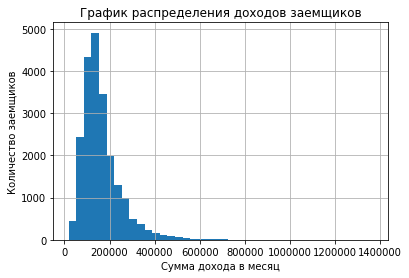

In [35]:
#Для того, чтобы определить метод разбиения уровня дохода на диапозоны, построим график распределения переменной total_income
#Убедимся, что распределение не нормальное - скошенное (среднее и медиана переменной сильно отличаются)
ax = df.total_income.hist(bins=40, range=(18422.063, 1367629.2))
plt.title('График распределения доходов заемщиков')
ax.set_xlabel('Сумма дохода в месяц')
ax.set_ylabel('Количество заемщиков')

<div class="alert alert-success">
    <b>Успешно: </b>хорошие выводы на протяжении всей работы - это очень здорово что ты построил здесь график. Ниже дал рекоммендацию, которую нужно выполнить для сдачи проекта и желательно следовать ей в будущем.
</div>

<div class="alert alert-danger">
    <b>Нужно исправить: </b>при построение графиков, нужно указывать название осей и самого графика. Да, можно посмотреть на код и понять что это за график, но аналитик должен уметь правильно, красиво и легко доносить информацию до других людей. 
    
Также считаю важным отметить, что при построении данного графика следует воспользоваться параметрами bins and range, которые помогут сделать график более информативным.
    
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
</div>

<font color='blue'>Ответ на комментарий.
Я добавил в график название и подписи абсциссы и ординаты.
Также добавил в график аргумент bins.
Bins - если указано целое число, то оно определяет количество интервалов равной ширины всех ячеек (по умолчанию 10 ячеек). Я принял решение обозначить 40, хотя, за частую настраиваю 30. 
Range  - определяет минимальное и максимальное значение ширины ячеек, при этом значения выходящие за пределы диапазона игнорируются. Если range = None то границы определяются интервалом (a.min(), a.max()). В данном случае, экстремально высокие значения ежемесячного дохода, действительно, сильно смещает график распределения значений, такой график сильно проигрывает в интерпретации. Я принял решение построить график без 8 экстремально высоких показтелей дохода с минимальной насыщенностью (8 кейсов) - для улучшения интерпретации распределения (такое распределение также скошено влево). Хотя, конечно, на нормальность нужно проверять распределение той или иной переменной с помощью теста Шапиро_Уилка (отклонение нулевой гипотезы о нормальности распределения случайной велечины). Но иногда визуаализация распределения позволяет сделать предварительные выводы о распределении (Например, если распределение в целом унимодально и симметрично, то оно наверняка нормальное).
Также я полагаю, что я не по совсем верным методом определил параметр range - здесь, наверное, нужно как-то сэплировать - в общем, нужен твой профессиональный совет, Глеб.

***
Распределения реальных данных крайне редко встречаются нормальными - это вообще не проблема для статистики. 
Например, если мы применим метод логарифмирования переменной "ежемесечного дохода в месяц", то мы получим адекватное распределение для применения статистических методов (t, f-тест и т.д.).
Насколько я здесь мыслю правильно? 
Вот, например, результат логарифмирования в следующей строке. 
    
***
Еще раз спасибо за то, что уделил внимание моей работе, Глеб!
С Уважением,
Maxim Mandrik

In [ ]:
#Логарифмируем 

Text(0, 0.5, 'Количество заемщиков')

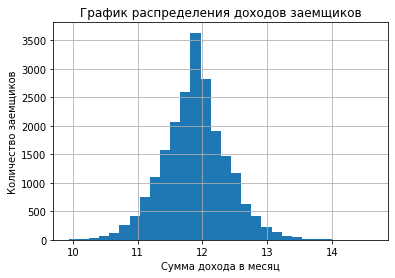

In [39]:
ax = np.log(df.total_income).hist(bins=30)
plt.title('График распределения доходов заемщиков')
ax.set_xlabel('Сумма дохода в месяц')
ax.set_ylabel('Количество заемщиков')

In [398]:
#Выбираем метод qcut (между процентилями и cut) - ввиду ненормальности распределения. Сохраняем серию результат в новую переменную.
df_qcut_new = pd.qcut(df['total_income'],5)
df_qcut_new

0        (214618.2, 2265604.0]
1          (98538.6, 132135.2]
2         (132135.2, 161335.8]
3        (214618.2, 2265604.0]
4         (132135.2, 161335.8]
                 ...          
21449    (214618.2, 2265604.0]
21450     (132135.2, 161335.8]
21451     (20666.999, 98538.6]
21452    (214618.2, 2265604.0]
21453     (20666.999, 98538.6]
Name: total_income, Length: 21454, dtype: category
Categories (5, interval[float64]): [(20666.999, 98538.6] < (98538.6, 132135.2] < (132135.2, 161335.8] < (161335.8, 214618.2] < (214618.2, 2265604.0]]

In [399]:
#Создаем новый дата-фрейм, на основе которого будем проводить дальнейшую группировку
df_q_test = pd.DataFrame({'income': df_qcut, 'debt': df.debt})

In [400]:
#Выводим результат группировки с аггрегированными значения debt
df_q_test.groupby('income')['debt'].agg(['mean', 'count']).reset_index()

,income,mean,count
0,"(18422.063, 469654.4]",0.081495,21167
1,"(469654.4, 918641.8]",0.054264,258
2,"(918641.8, 1367629.2]",0.047619,21
3,"(1367629.2, 1816616.6]",0.000000,6
4,"(1816616.6, 2265604.0]",0.500000,2


### Вывод

    Реузультат группировки позволяет сделать следующие выводы:
    1.С ростом располагаемого дохода в месяц у заемщиков значение среднего показателя невозврата кредита уменьшается (ровно как и экспоненциально уменьшается количество кейсов с определенным доходом)
    2.Заемщики со сверхбольшими доходами (в районе 2-х млн. рублей) обладают критически высоким показателем невовзрата кредита в срок (50%). В данном диапозоне таких заемщиков - 2, это значит, что, по крайней мере, один из них является должником банку. Примечательно, что вместе с представителями другой экстремально высокой доходной группы (от 1.3 до 1.8 млн. рублей) эти заемщики составляют всего 8 человек (это 0.03% выборки - что крайне не велико даже если учесть часть заемщиков из предыдущей категории.
    3.Таким образом, остается открытым вопрос о происхождении критически высоких сумм денежных доходов заемщиков. С одной стороны, некоторая часть из высокодоходных групп являются должниками, с другой, представители других высокодоходных групп имеют довольно низкий показатель невозврата кредита. Возможным предположением наличия в датасете заемщиков со сверхвысокими доходами является то, что среди заемщиков есть юридические лица. 


    - Как разные цели кредита влияют на его возврат в срок?

    Для того, чтобы ответить на этот вопрос, сгруппируем данные с категоризацией лемм подготовленной в предыдущем разделе таблицы с аггрегированными значениями среднего и количества переменной debt - информация о задолженности по кредиту (1 - да, 0 - нет).

In [401]:
df_purpose_case = df_analysed.groupby('categorizer')['debt'].agg(['mean', 'count']).reset_index()
df_purpose_case

,categorizer,mean,count
0,автомобиль,0.093590,4306
1,образование,0.092200,4013
2,реализация жилья/недвижимости,0.073207,10204
3,ремонт жилья/недвижимости,0.057661,607
4,свадьба,0.080034,2324


### Вывод

    Несмотря на довольно грубую категоризацию, сводная таблица обладает интерпретационной сложностью.
    Наиболее высоким (выше среднего по выборке) фактором риска невозврата кредита является автомобиль и образование (от 9%). Остальные показатели - ниже среднего, в то время как ремонт жилья/недвижимости - наименее определяющая невозврат кредита в срок категория.
    Ближе к границе среднего - категория "свадьба", этот кейс требует дополнительного исследования в срезе других данных, например, возраста, семейного статуса (второй брак) и т.д.


### Шаг 4. Общий вывод

    *Техническая интерпретация

    В рамках проекта нам удалось на предварительном этапе знакомства с данными (предварительной части - предшествующей полноценному разведовательному анализу) сформулировать первые гипотезы о возможным закономерностях в данных и их взаимосвязи (ненаполненность категорий, высокий размах доходов, наличие ошибок (багах)).
    Поиск и замена пропущенных значений, а также работа с дубликатами (прямыми и их производными значениями) позволил подготовить датасет о кредитных заемщиков для последующего анализа взаимосвязи между четырьмя ключевыми переменными, последнюю из которых мы определелили с помощью лемматизации, как то: наличие детей, семейное положение, уровень ежемесячного дохода и цель кредита, -  и переменной вовзрата кредита. 
    Результатом замены пропущенных значений данных позволил включить в анализ такую важную переменную, как "возраст", которая раскрыла искомые нами взаимосвязи в категории "количество детей".
    С одной стороны, предобработка "битых" данных помогла с поиском причин анломалий в значениях и категоризировать значения переменных - с другой - само наличие трудно предсказуемых пропущенных значений, например, в переменной "общий стаж в днях" - существенным образом усложнило применение этой категории в анализе (требуется исключение "несуществующих значений", которыми были заполнены пропуски). Вопрос актуализируется сензентивностью темы - кредитного займа - предполагающего детального взвешивания того или иного значения переменной в структуре данных.

    *Содержательная интерпретация 

    Средний показатель невозврата кредита в срок в генеральной совокупности не высокий, но с достаточно высоким отклонением (приблизительно 0.08 , с стандартным отклонением в 0,27). Это стимулировало обращение инструментов многомерного среза категорий по косвенным переменным. Так, результатом группировки по переменной "дети" средних значений булиевой переменной "наличие задолженности по кредиту" стал контринтуитивный вывод о том, что роста количество детей негативным образом отражается на возврат кредита, в то время как у заемщиков с наибольшим количеством детей долгов по кредиту не обнаружено. Применение дополнительной группировки данных по переменной возраст позволило обнаржить некоторую неравномерность в распределении индексов этих данных в зависимости от возрастной категории заемщиков с определенным количеством детей и определить те возрастные категории с бОльшим количеством детей, значения среднего показателя возврата кредита которых смещает средний показать по категории "дети".
    Не менее интересной находкой является особенности взаимосвязи между переменными уровня дохода и возвратом кредита: и здесь привлекает внимание не столько тот предсказуемый вывод, согласно которому с ростом доха снижается шанс невозврата кредита, сколько то, что величина размаха дохода предположительно (гипотеза о недостоверности данных) должна была оказать влияние на данный возврат в более сложной динамике. Снижение показателя невовзврата с ростом дохода важно оценивать в разрезе экспоненциально снижающего количество заемщиков с такими доходами. Интересено и предположение о том, что один из заемщиков со свердоходом, просрочившего выплату - это представитель псевдо-высокодоходной групы. На этом этапе требуется более глубокая проработка. Любопытно,что представленное в теле проекта предположения о возможном наличии в данных заемщиков - эридических лиц, можно наглядно проверить на сводной таблице с группами "целей" кредитного заема (можно проверить, занимают ли представители высокодоходных групп кредит на покупку коммерческой недвижимости).
    Вывод о влиянии семейного положения на возврат кредита довольно хорошо подается интерпретации в социологическом измерении. 

    *Рекоммендации по преобразованию данных:

    В рамках более детального анализа мы бы рекоммендовали включить в датасет две важные переменны: 1) id заемщиков , 2) сумма выданного кредита. 

    Также позволим себе рекоммендацию по категоризации переменных: более сложную классификацию переменной "тип дохода" (или "тип занятости"), более адекватно отражающую стратификационное деленения современного капиталистического общества: срез вида "госслужащий, 40 лет, доход 90, имеет 3 детей" - слабо классифируемая информация в перспективе отнесения к (новым-) социальным классам. 


    Перспективы оптимизации аналитики кода:

    Список "тех или иных лемм" мы прям зашиваем в код? Т.е. принимаем, что алгоритм поддерживает какой-то ограниченный набор категорий (например, "жилье", "автомобиль", "свадьба" и т.д.) и не более того. Что если появятся новые данные? Я бы предложил автоматизировать алгоритм через создание словаря вне puthon, к которому можна обратиться и дополнить, не меняя сам код. В сам коде можно импортировать данный внешний словарик (например, из базы данных SQL). 

<div class="alert alert-success">
Прекрасные структурированные выводы. Я отметил твою оригинальность в разделение вывода на три части, мне это понравилось, достаточно удобно.
    <br><br>
Отличное замечание по поводу лемм. В данном случае мы работаем со статическими данными и нам нет необходимости ожидать новых данных. Но если мы хотим построить пайплайн по обработки данных, то есть автоматизировать обработку данных, в таком случае я бы сначала приводил к нижнему регистру, проверял автоматически на ошибки слова, сравнивал с имеющимися в словаре и только после, если никуда не смог отнести это слово, отлавливал и думал дальше как с ним поступить. Либо добавить в имещуюся категорию и расширить словарь или создат новую.
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.